### TASK 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

In [10]:
data = boston.data

In [11]:
feature_names = boston.feature_names

In [12]:
X = pd.DataFrame(data, columns= feature_names)

In [13]:
target = boston.target

In [14]:
y = pd.DataFrame(target, columns = ['price'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


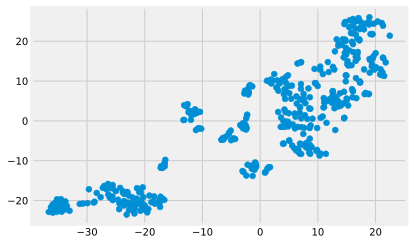

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### TASK 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

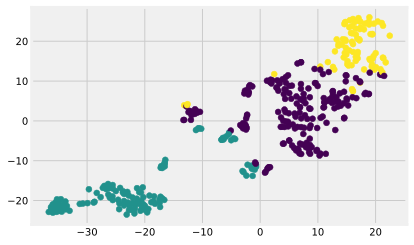

In [25]:
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [27]:
labels_test = kmeans.predict(X_test_scaled)

In [32]:
labels_test

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

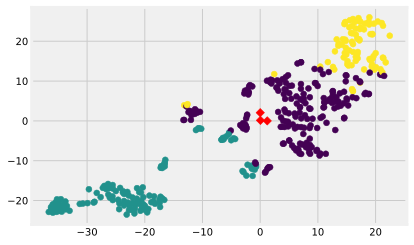

In [33]:
centers = kmeans.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.show()

#### странные данные по центрам...

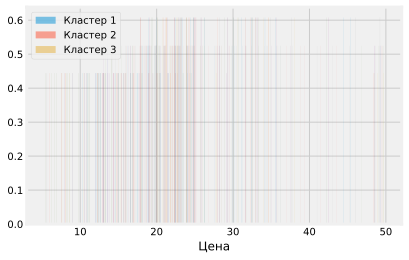

In [36]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('Цена')

plt.show()

#### и также не понимаю, почему гистограмма берет все значения по столбцам в себя...

Подсчитаем среднее по цене:

In [42]:
y_train.mean()

price    22.796535
dtype: float64

In [39]:
y_train[labels_train == 0].mean()

price    24.958115
dtype: float64

In [40]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [43]:
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64

Разница между 2 (lt == 1) и остальными кластерами очевидна. 1 и 3 не так отличаются

Посмотрим на параметр CRIM

In [44]:
'Кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean())

'Кластер 1: 0.42166020942408367'

In [45]:
'Кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean())

'Кластер 2: 10.797028425196853'

In [47]:
'Кластер 3: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean())

'Кластер 3: 0.07356558139534886'

Очевидно, что кластеры отличаются по этому параметру и резко выделяется 2 кластер. Разница между 1 и 3 не столь существенна. Хотя можно и корреляцию посмотреть цены и значений этого параметра

### TASK 3 
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


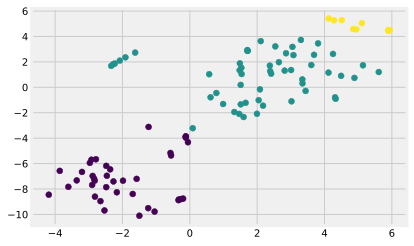

In [48]:
labels_test = kmeans.fit_predict(X_test_scaled)

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [49]:
y_test.mean()

price    21.488235
dtype: float64

In [50]:
y_test[labels_test == 0].mean()

price    16.710526
dtype: float64

In [51]:
y_test[labels_test == 1].mean()

price    22.690909
dtype: float64

In [52]:
y_test[labels_test == 2].mean()

price    34.311111
dtype: float64

In [53]:
'Кластер 1: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean())

'Кластер 1: 9.419181842105264'

In [54]:
'Кластер 2: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean())

'Кластер 2: 0.21929690909090907'

In [55]:
'Кластер 3: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean())

'Кластер 3: 0.04070333333333334'

ВЫВОД: Явно, что на тестовой выборке Кластер 1 коррелирует с Кластером 2 на тренировочной выборке. Также Кластер 2 коррелирует с Кластером 1 из тренировочной выборки. Кластер 3 коррелирует с Кластером 3